In [1]:
# 1. Data Upoad

from google.colab import files

upload = files.upload()

Saving diabetes_data.csv to diabetes_data.csv


In [2]:
#2. Data 불러오기

import pandas as pd

data = pd.read_csv('diabetes_data.csv')
data.head()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#3. 데이터 살펴보기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnant        768 non-null    int64  
 1   gloucose        768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skin thickness  768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   DPF             768 non-null    float64
 7   age             768 non-null    int64  
 8   result          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,pregnant,gloucose,blood pressure,skin thickness,insulin,BMI,DPF,age,result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#4. Feature/Label 분리

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [8]:
#5. Train/Test 분리

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [27]:
#6. Keras Package

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

print(keras.__version__)

2.4.0


In [28]:
#7. MLP 모델 생성

# 모델 초기화
model = Sequential()
# input layer
model.add(Dense(units=64, input_dim= 8, activation= 'relu'))
# hidden layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=32, activation='relu'))
# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_9 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 13,057
Trainable params: 13,057
Non-trainable params: 0
_________________________________________________________________


In [29]:
#7-1. compile

model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [18]:
?model

In [33]:
#8. Train

from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=10)

batch_size = 16
epochs = 100

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          validation_split=0.15,
          epochs=epochs,
          callbacks=[early_stop],
          verbose=1)

Epoch 1/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7236 - val_loss: 0.5850 - val_accuracy: 0.7527
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7562 - val_loss: 0.6114 - val_accuracy: 0.7527
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7505 - val_loss: 0.7261 - val_accuracy: 0.7634
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5117 - accuracy: 0.7524 - val_loss: 0.6664 - val_accuracy: 0.7634
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7620 - val_loss: 0.6594 - val_accuracy: 0.7849
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7774 - val_loss: 0.6432 - val_accuracy: 0.7742
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7447 - val_loss: 0.5345 - val_accuracy: 0.7527
Epoch 8/100
3

In [34]:
#9. Test/Evaluate

train_acc = model.evaluate(X_train, y_train)
test_acc = model.evaluate(X_test, y_test)

print(train_acc)
print(test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 1.2636 - accuracy: 0.7143
[0.50932377576828, 0.7719869613647461]
[1.2635548114776611, 0.7142857313156128]


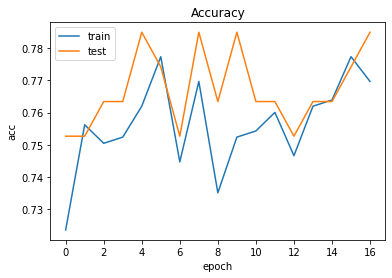

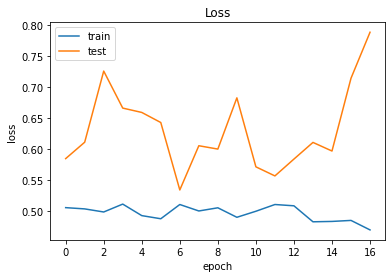

In [35]:
#10. 학습과정 시각화

import matplotlib.pyplot as plt
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
#11. model save

from keras.models import load_model

model.save('diabetes_model.h5')

In [38]:
model = model.load_weights('diabetes_model.h5')